In [61]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

### Loading the Datasets

In [6]:
hourly_df= pd.read_csv(r'hourly_data.csv')
monthly_df= pd.read_csv(r'monthly_data.csv')
daily_df= pd.read_csv(r'daily_data.csv')
three_hour_df= pd.read_csv(r'three_hour_data.csv')

C:\Users\princ\AppData\Local\Temp\ipykernel_10888\2265092222.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_df= pd.read_csv(r'hourly_data.csv')


In [8]:
hourly_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T00:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,46,30.05,29.72,10.0,18,150,10,9/8/2006
1,72518014735,2015-01-01T01:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,48,30.04,29.71,10.0,18,170,8,9/8/2006
2,72518014735,2015-01-01T02:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,20,0,52,30.03,29.7,10.0,16,180,6,9/8/2006
3,72518014735,2015-01-01T03:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,19,0,57,30.03,29.7,10.0,16,190,7,9/8/2006
4,72518014735,2015-01-01T04:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,21,0,52,30.04,29.71,10.0,17,170,8,9/8/2006


In [10]:
monthly_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
0,72518014735,2015-01-31T23:59:00,SOM,6,8.9,PRECIP,260,PLASTIC,42.6918,-73.83109,...,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0,2006-09-08
1,72518014735,2015-02-28T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0,2006-09-08
2,72518014735,2015-03-31T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,29.8,29.56,17.0,1251.0,20.7,30.10,29.76,1.25,929.0,2006-09-08
3,72518014735,2015-04-30T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,47.8,29.54,21.0,451.0,36.9,29.98,29.66,2.10,520.0,2006-09-08
4,72518014735,2015-05-31T23:59:00,SOM,6,8.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,65.6,29.71,12.0,1251.0,52.8,30.09,29.77,1.05,235.0,2006-09-08


In [11]:
daily_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08


In [12]:
three_hour_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T01:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.09,8,46,30.05,29.72,9.94,18,150,10,9/8/2006
1,72518014735,2015-01-01T04:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.02,6,57,30.03,29.7,9.94,16,190,7,9/8/2006
2,72518014735,2015-01-01T07:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.02,1,52,30.05,29.72,9.94,17,160,9,9/8/2006
3,72518014735,2015-01-01T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.01,3,44,30.06,29.72,9.94,21,180,11,9/8/2006
4,72518014735,2015-01-01T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.11,8,38,29.95,29.62,9.94,23,170,15,9/8/2006


## Handling Special Values

- Since in our dataset, it is mentioned, the following values can be encountered :tion.

s = suspect value (appears together with value).
T = trace precipitation amount or snow depth (an amount too small to measure, usually < 0.005 inches water
equivalent) (appears instead of numeric value).
M = missing value (appears instead of value).
VRB = variable wind direction.

So, we need to take care of it .

### For daily_df:

In [32]:
# Replace special values in daily_df
daily_df.replace({'s': np.nan, 'T': 0.001, 'M': np.nan}, inplace=True)
daily_df['DailyPeakWindDirection'].replace('VRB', 'Variable', inplace=True)
daily_df['DailyPrecipitation'] = pd.to_numeric(daily_df['DailyPrecipitation'], errors='coerce')

### For monthly_df:

In [34]:
# Replace special values in monthly_df
monthly_df.replace({'s': np.nan, 'T': 0.001, 'M': np.nan}, inplace=True)
monthly_df['MonthlyTotalLiquidPrecipitation'] = pd.to_numeric(monthly_df['MonthlyTotalLiquidPrecipitation'], errors='coerce')

### For hourly_df:

In [33]:
# Replace special values in hourly_df
hourly_df.replace({'s': np.nan, 'T': 0.001, 'M': np.nan}, inplace=True)
hourly_df['HourlyWindDirection'].replace('VRB', 'Variable', inplace=True)
hourly_df['HourlyPrecipitation'] = pd.to_numeric(hourly_df['HourlyPrecipitation'], errors='coerce')

### For three_hour_df:

In [36]:
# Replace special values in three_hour_df
three_hour_df.replace({'s': np.nan, 'T': 0.001, 'M': np.nan}, inplace=True)
three_hour_df['HourlyWindDirection'].replace('VRB', 'Variable', inplace=True)

In [28]:
# Ensuring data types are appropriate
print(daily_df.dtypes)
print(monthly_df.dtypes)
print(hourly_df.dtypes)
print(three_hour_df.dtypes)

STATION                                         int64
DATE                                           object
REPORT_TYPE                                    object
SOURCE                                          int64
BackupElements                                 object
BackupElevation                                 int64
BackupEquipment                                object
BackupLatitude                                float64
BackupLongitude                               float64
BackupName                                     object
DailyAverageDewPointTemperature               float64
DailyAverageDryBulbTemperature                float64
DailyAverageRelativeHumidity                  float64
DailyAverageSeaLevelPressure                  float64
DailyAverageStationPressure                   float64
DailyAverageWetBulbTemperature                float64
DailyAverageWindSpeed                         float64
DailyCoolingDegreeDays                        float64
DailyDepartureFromNormalAver

## Exploratory Data Analysis

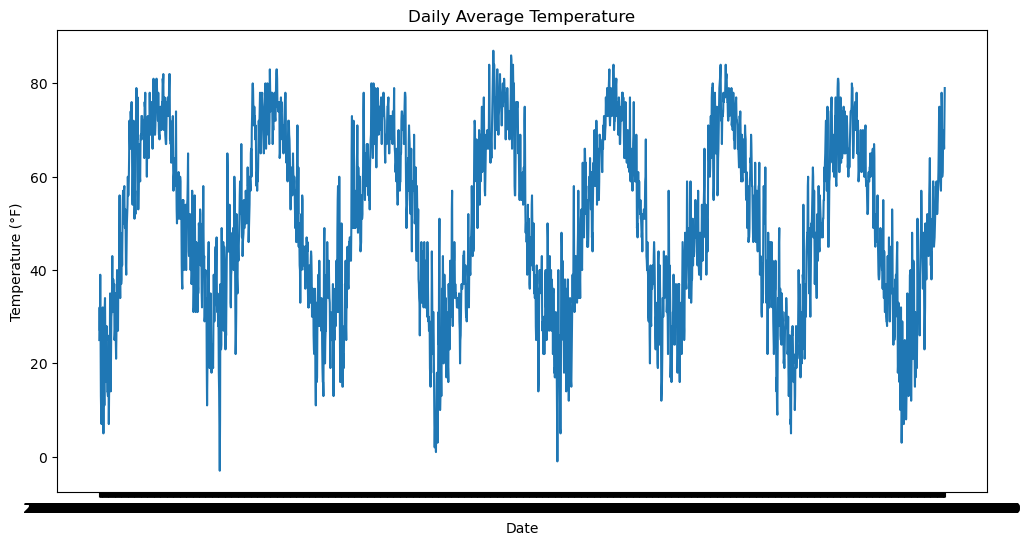

In [29]:
# Plotting Daily Average Temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_df['DATE'], daily_df['DailyAverageDryBulbTemperature'])
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

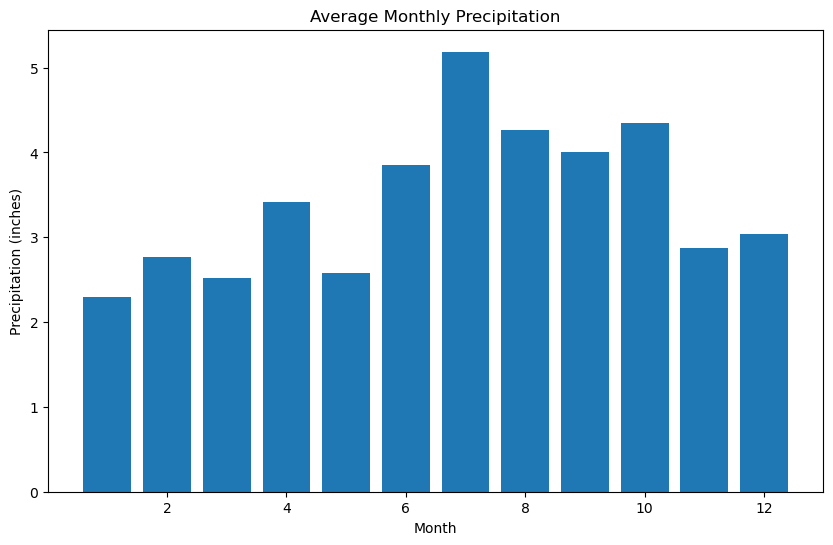

In [38]:
# Plotting Monthly Precipitation
monthly_df['DATE'] = pd.to_datetime(monthly_df['DATE'])

# Extract month from date
monthly_df['MONTH'] = monthly_df['DATE'].dt.month

# Group by month and calculate mean of precipitation
monthly_precip = monthly_df.groupby('MONTH')['MonthlyTotalLiquidPrecipitation'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_precip.index, monthly_precip.values)
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)')
plt.title('Average Monthly Precipitation')
plt.show()


<Figure size 10000x3000 with 0 Axes>

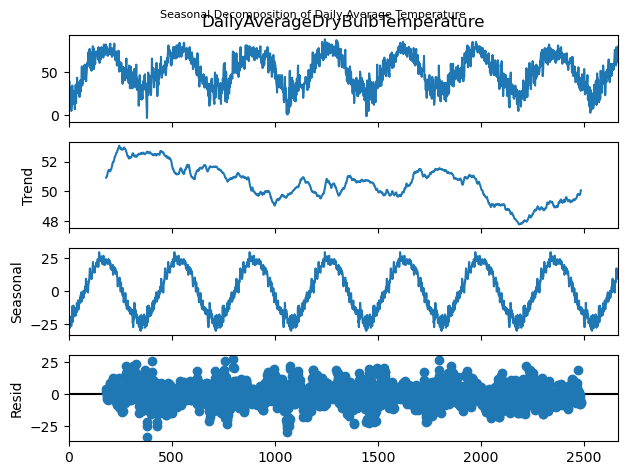

In [53]:
# Seasonal decomposition of daily temperature from daily_df
decomposition = seasonal_decompose(daily_df['DailyAverageDryBulbTemperature'], model='additive', period=365)
plt.figure(figsize=(100, 30))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Daily Average Temperature', fontsize=8)
plt.show()

## Trend Analysis

In [57]:
# Calculate monthly mean temperature
monthly_mean_temp = monthly_df.groupby('MONTH')['MonthlyMeanTemperature'].mean()

In [58]:
# Calculate 12-month moving average
ma_12 = monthly_mean_temp.rolling(window=12).mean()

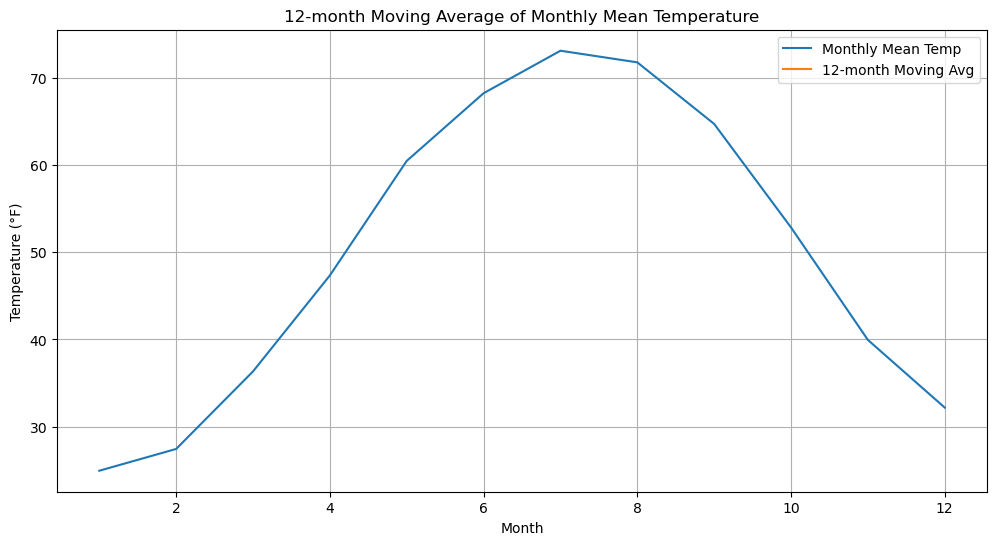

In [59]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp, label='Monthly Mean Temp')
plt.plot(ma_12.index, ma_12, label='12-month Moving Avg')
plt.title('12-month Moving Average of Monthly Mean Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)
plt.show()

## Correlation Analysis

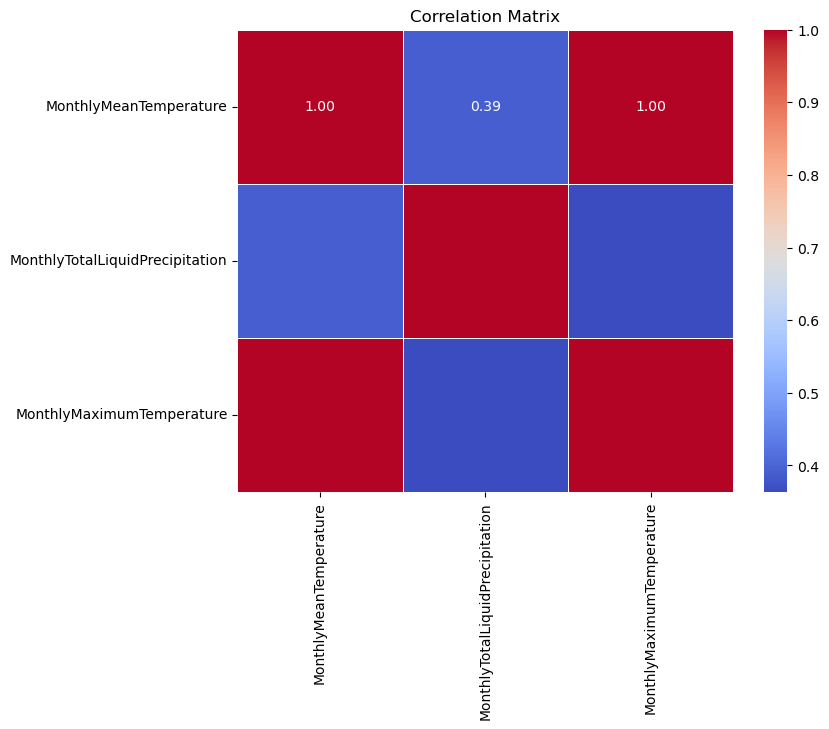

In [63]:
# Calculate correlation matrix
corr_matrix = monthly_df[['MonthlyMeanTemperature', 'MonthlyTotalLiquidPrecipitation', 'MonthlyMaximumTemperature']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

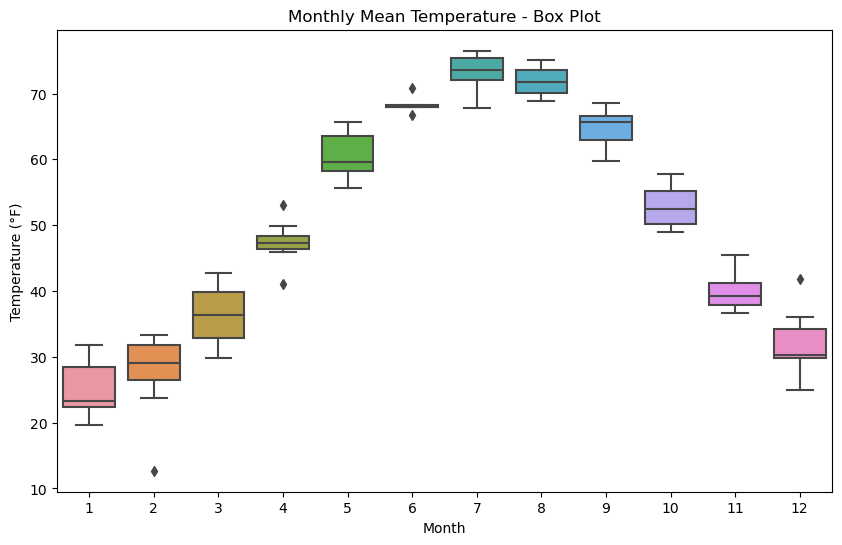

In [64]:
# Box plot of monthly mean temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x='MONTH', y='MonthlyMeanTemperature', data=monthly_df)
plt.title('Monthly Mean Temperature - Box Plot')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.show()


C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


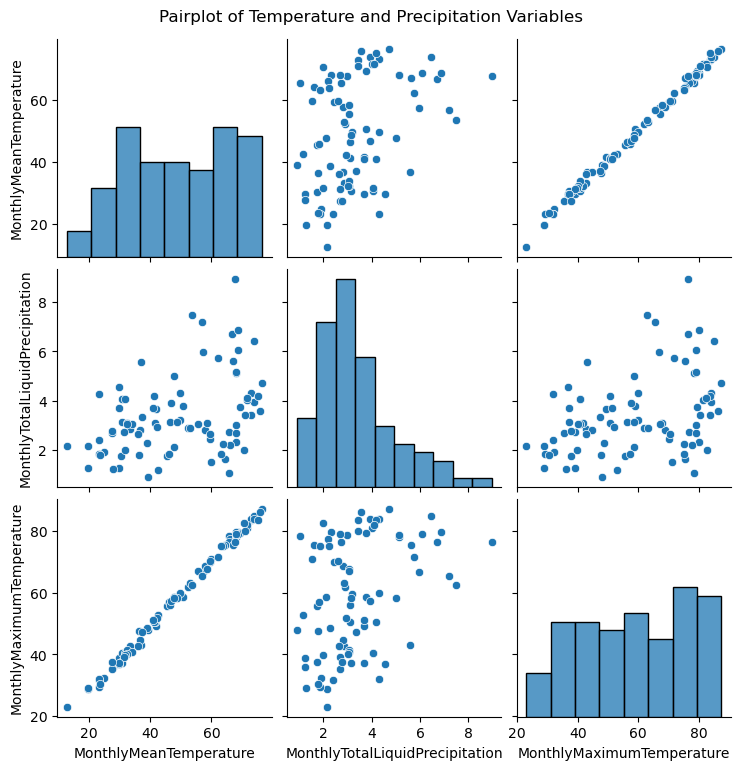

In [65]:
# Pairplot for selected variables
sns.pairplot(monthly_df[['MonthlyMeanTemperature', 'MonthlyTotalLiquidPrecipitation', 'MonthlyMaximumTemperature']])
plt.suptitle('Pairplot of Temperature and Precipitation Variables', y=1.02)
plt.show()


## Now, performing the analysis in Power BI for better visualization

In [69]:
# Preparing the data
# Clean and handle missing/suspect values
def clean_data(df):
    df.replace({'s': None, 'T': 0, 'M': None, 'VRB': None}, inplace=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    return df

In [70]:
daily_df_cleaned = clean_data(daily_df)
hourly_df_cleaned = clean_data(hourly_df)
monthly_df_cleaned = clean_data(monthly_df)
three_hour_df_cleaned = clean_data(three_hour_df)

In [73]:
# Saving cleaned data to Excel files
daily_df_cleaned.to_excel('daily_data_cleaned.xlsx', index=False,engine='openpyxl')
hourly_df_cleaned.to_excel('hourly_data_cleaned.xlsx', index=False,engine='openpyxl')
monthly_df_cleaned.to_excel('monthly_data_cleaned.xlsx', index=False,engine='openpyxl')
three_hour_df_cleaned.to_excel('three_hour_data_cleaned.xlsx', index=False,engine='openpyxl')